# Feature Engineering(Dhaka-2020 Dataset) 

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
aqi_data = pd.read_csv("F:\\CLASS\\CSE498R(Directed Research)\\Dataset\\Dhaka\\real_2020.csv")

In [3]:
aqi_data.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,20.1,28.5,14.6,1018.2,65,2.9,1.1,5.4,304.0,EU
1,2,21.7,28,15.6,1018,71,3.4,1.1,5.4,277.0,VU
2,3,18.7,22.5,17,1016.2,89,3.1,3.1,13,130.0,C
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0,C
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,VU


In [4]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   D         366 non-null    object 
 1   T         210 non-null    object 
 2   TM        210 non-null    object 
 3   Tm        210 non-null    object 
 4   SLP       210 non-null    object 
 5   H         210 non-null    object 
 6   VV        210 non-null    object 
 7   V         210 non-null    object 
 8   VM        210 non-null    object 
 9   AQI       348 non-null    float64
 10  Category  348 non-null    object 
dtypes: float64(1), object(10)
memory usage: 31.6+ KB


In [5]:
pd.options.display.max_columns = None
display(aqi_data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,20.1,28.5,14.6,1018.2,65,2.9,1.1,5.4,304.0,EU
1,2,21.7,28,15.6,1018,71,3.4,1.1,5.4,277.0,VU
2,3,18.7,22.5,17,1016.2,89,3.1,3.1,13,130.0,C
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0,C
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,VU
...,...,...,...,...,...,...,...,...,...,...,...
361,27,19.4,25,15.6,1012.5,62,3.4,1.9,3.5,324.0,EU
362,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,EU
363,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.0,EU
364,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.0,EU


In [6]:
aqi_data.isnull().sum()

D             0
T           156
TM          156
Tm          156
SLP         156
H           156
VV          156
V           156
VM          156
AQI          18
Category     18
dtype: int64

In [7]:
aqi = aqi_data.replace("-",np.nan)
aqi

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,20.1,28.5,14.6,1018.2,65,2.9,1.1,5.4,304.0,EU
1,2,21.7,28,15.6,1018,71,3.4,1.1,5.4,277.0,VU
2,3,18.7,22.5,17,1016.2,89,3.1,3.1,13,130.0,C
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0,C
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,VU
...,...,...,...,...,...,...,...,...,...,...,...
361,27,19.4,25,15.6,1012.5,62,3.4,1.9,3.5,324.0,EU
362,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,EU
363,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.0,EU
364,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.0,EU


In [8]:
aqi.isnull().sum()

D             0
T           202
TM          202
Tm          202
SLP         202
H           202
VV          202
V           202
VM          219
AQI          18
Category     18
dtype: int64

<AxesSubplot:>

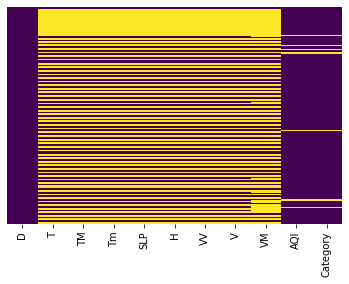

In [9]:
sns.heatmap(aqi.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 
T = Average Temperature (°C) , TM = Maximum temperature (°C), 

Tm = Minimum temperature (°C), SLP= Atmospheric pressure at sea level (hPa), 

H = Average relative humidity (%), VV = Average visibility (Km),

V = Average wind speed (Km/h), VM = Maximum sustained wind speed (Km/h), AQI = Air Quality Index


## Convert object type as float type

In [10]:
aqi['T'] = aqi['T'].replace({'NAN':np.nan}).astype(float)
aqi['TM'] = aqi['TM'].replace({'NAN':np.nan}).astype(float)
aqi['Tm'] = aqi['Tm'].replace({'NAN':np.nan}).astype(float)
aqi['SLP'] = aqi['SLP'].replace({'NAN':np.nan}).astype(float)
aqi['H'] = aqi['H'].replace({'NAN':np.nan}).astype(float)
aqi['VV'] = aqi['VV'].replace({'NAN':np.nan}).astype(float)
aqi['V'] = aqi['V'].replace({'NAN':np.nan}).astype(float)
aqi['VM'] = aqi['VM'].replace({'NAN':np.nan}).astype(float)

# Month-1(January)

Find monthly mean

In [11]:
df1 = aqi.iloc[0:31,0:11]
df1.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,20.1,28.5,14.6,1018.2,65.0,2.9,1.1,5.4,304.0,EU
1,2,21.7,28.0,15.6,1018.0,71.0,3.4,1.1,5.4,277.0,VU
2,3,18.7,22.5,17.0,1016.2,89.0,3.1,3.1,13.0,130.0,C
28,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,385.0,EU
29,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357.0,EU
30,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325.0,EU


In [12]:
df1.isnull().sum()

D            0
T           28
TM          28
Tm          28
SLP         28
H           28
VV          28
V           28
VM          28
AQI          0
Category     0
dtype: int64

In [13]:
df1["T"] = df1["T"].fillna(value=df1["T"].mean())
df1["TM"] = df1["TM"].fillna(value=df1["TM"].mean())
df1["Tm"] = df1["Tm"].fillna(value=df1["Tm"].mean())
df1["SLP"] = df1["SLP"].fillna(value=df1["SLP"].mean())
df1["H"] = df1["H"].fillna(value=df1["H"].mean())
df1["VV"] = df1["VV"].fillna(value=df1["VV"].mean())
df1["V"] = df1["V"].fillna(value=df1["V"].mean())
df1["VM"] = df1["VM"].fillna(value=df1["VM"].mean())

In [14]:
df1.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,20.100000,28.500000,14.600000,1018.200000,65.0,2.900000,1.100000,5.400000,304.0,EU
1,2,21.700000,28.000000,15.600000,1018.000000,71.0,3.400000,1.100000,5.400000,277.0,VU
2,3,18.700000,22.500000,17.000000,1016.200000,89.0,3.100000,3.100000,13.000000,130.0,C
3,4,20.166667,26.333333,15.733333,1017.466667,75.0,3.133333,1.766667,7.933333,124.0,C
4,5,20.166667,26.333333,15.733333,1017.466667,75.0,3.133333,1.766667,7.933333,204.0,VU


In [15]:
df1.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-2 (February)

In [16]:
df2 = aqi.iloc[31:60,0:11]
df2.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219.0,VU
32,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267.0,VU
33,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295.0,VU
57,27,22.1,26.2,16.5,1013.6,66.0,4.2,2.2,5.4,261.0,VU
58,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.0,VU
59,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.0,VU


In [17]:
df2.isnull().sum()

D            0
T           23
TM          23
Tm          23
SLP         23
H           23
VV          23
V           23
VM          25
AQI          2
Category     2
dtype: int64

In [18]:
df2["T"] = df2["T"].fillna(value=df2["T"].mean())
df2["TM"] = df2["TM"].fillna(value=df2["TM"].mean())
df2["Tm"] = df2["Tm"].fillna(value=df2["Tm"].mean())
df2["SLP"] = df2["SLP"].fillna(value=df2["SLP"].mean())
df2["H"] = df2["H"].fillna(value=df2["H"].mean())
df2["VV"] = df2["VV"].fillna(value=df2["VV"].mean())
df2["V"] = df2["V"].fillna(value=df2["V"].mean())
df2["VM"] = df2["VM"].fillna(value=df2["VM"].mean())
df2["AQI"] = df2["AQI"].fillna(value=df2["AQI"].mean())

In [19]:
df2.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,22.233333,27.816667,17.216667,1014.566667,66.166667,4.15,1.233333,5.95,219.0,VU
32,2,22.233333,27.816667,17.216667,1014.566667,66.166667,4.15,1.233333,5.95,267.0,VU
33,3,22.233333,27.816667,17.216667,1014.566667,66.166667,4.15,1.233333,5.95,295.0,VU
34,4,22.233333,27.816667,17.216667,1014.566667,66.166667,4.15,1.233333,5.95,306.0,EU
35,5,22.233333,27.816667,17.216667,1014.566667,66.166667,4.15,1.233333,5.95,268.0,VU


In [20]:
df2.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    2
dtype: int64

# Month-3(March)

In [21]:
df3 = aqi.iloc[60:91,0:11]
df3.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
60,Mar-01,25.6,31.4,18.6,1010.9,52.0,4.5,2.8,5.4,290.0,VU
61,2,25.2,30.9,19.3,1010.8,60.0,4.3,2.0,5.4,286.0,VU
62,3,23.8,29.8,17.8,1010.2,59.0,4.3,5.2,9.4,252.0,VU
88,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,U
89,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.0,U
90,31,28.8,36.0,21.4,1008.8,39.0,5.5,2.2,9.4,169.0,U


In [22]:
df3.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          7
Category     7
dtype: int64

In [23]:
df3["T"] = df3["T"].fillna(value=df3["T"].mean())
df3["TM"] = df3["TM"].fillna(value=df3["TM"].mean())
df3["Tm"] = df3["Tm"].fillna(value=df3["Tm"].mean())
df3["SLP"] = df3["SLP"].fillna(value=df3["SLP"].mean())
df3["H"] = df3["H"].fillna(value=df3["H"].mean())
df3["VV"] = df3["VV"].fillna(value=df3["VV"].mean())
df3["V"] = df3["V"].fillna(value=df3["V"].mean())
df3["VM"] = df3["VM"].fillna(value=df3["VM"].mean())
df3["AQI"] = df3["AQI"].fillna(value=df3["AQI"].mean())

In [24]:
df3.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
60,Mar-01,25.60000,31.4000,18.60000,1010.90000,52.0,4.500,2.80000,5.400,290.000000,VU
61,2,25.20000,30.9000,19.30000,1010.80000,60.0,4.300,2.00000,5.400,286.000000,VU
62,3,23.80000,29.8000,17.80000,1010.20000,59.0,4.300,5.20000,9.400,252.000000,VU
63,4,26.23125,32.1375,20.40625,1010.65625,57.0,4.625,2.49375,6.975,200.000000,U
64,5,26.23125,32.1375,20.40625,1010.65625,57.0,4.625,2.49375,6.975,225.791667,NaN


In [25]:
df3.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    7
dtype: int64

# Month-4(April)

In [26]:
df4 = aqi.iloc[91:121,0:11]
df4.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
91,Apr-01,30.0,36.0,21.8,1007.4,48.0,5.5,1.1,5.4,227.0,VU
92,2,28.5,36.7,24.7,1006.4,59.0,4.7,5.7,13.0,159.0,U
93,3,28.3,35.4,24.3,1008.5,67.0,5.0,1.9,5.4,149.0,C
118,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,M
119,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,M
120,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,M


In [27]:
df4.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          0
Category     0
dtype: int64

In [28]:
df4["T"] = df4["T"].fillna(value=df4["T"].mean())
df4["TM"] = df4["TM"].fillna(value=df4["TM"].mean())
df4["Tm"] = df4["Tm"].fillna(value=df4["Tm"].mean())
df4["SLP"] = df4["SLP"].fillna(value=df4["SLP"].mean())
df4["H"] = df4["H"].fillna(value=df4["H"].mean())
df4["VV"] = df4["VV"].fillna(value=df4["VV"].mean())
df4["V"] = df4["V"].fillna(value=df4["V"].mean())
df4["VM"] = df4["VM"].fillna(value=df4["VM"].mean())

In [29]:
df4.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
91,Apr-01,30.000000,36.000000,21.80,1007.400000,48.0,5.500000,1.100000,5.400000,227.0,VU
92,2,28.500000,36.700000,24.70,1006.400000,59.0,4.700000,5.700000,13.000000,159.0,U
93,3,28.300000,35.400000,24.30,1008.500000,67.0,5.000000,1.900000,5.400000,149.0,C
94,4,28.253333,33.986667,23.18,1008.693333,69.2,4.846667,3.113333,6.773333,153.0,U
95,5,28.253333,33.986667,23.18,1008.693333,69.2,4.846667,3.113333,6.773333,149.0,C


In [30]:
df4.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-5 (May)

In [31]:
df5 = aqi.iloc[121:152,0:11]
df5.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
121,May-01,25.3,28.8,23.6,1008.2,90.0,4.3,1.1,5.4,89.0,M
122,2,25.4,30.5,21.6,1006.6,89.0,4.3,3.7,9.4,70.0,M
123,3,27.7,33.0,22.7,1007.0,78.0,5.0,1.5,5.4,54.0,M
149,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,M
150,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,G
151,31,30.2,35.0,25.6,1007.3,72.0,5.5,2.8,5.4,71.0,M


In [32]:
df5.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          0
Category     0
dtype: int64

In [33]:
df5["T"] = df5["T"].fillna(value=df5["T"].mean())
df5["TM"] = df5["TM"].fillna(value=df5["TM"].mean())
df5["Tm"] = df5["Tm"].fillna(value=df5["Tm"].mean())
df5["SLP"] = df5["SLP"].fillna(value=df5["SLP"].mean())
df5["H"] = df5["H"].fillna(value=df5["H"].mean())
df5["VV"] = df5["VV"].fillna(value=df5["VV"].mean())
df5["V"] = df5["V"].fillna(value=df5["V"].mean())
df5["VM"] = df5["VM"].fillna(value=df5["VM"].mean())

In [34]:
df5.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
121,May-01,25.3,28.8000,23.60000,1008.2,90.000,4.300,1.1,5.40000,89.0,M
122,2,25.4,30.5000,21.60000,1006.6,89.000,4.300,3.7,9.40000,70.0,M
123,3,27.7,33.0000,22.70000,1007.0,78.000,5.000,1.5,5.40000,54.0,M
124,4,27.9,32.6875,23.70625,1004.7,82.125,4.825,4.8,9.55625,85.0,M
125,5,27.9,32.6875,23.70625,1004.7,82.125,4.825,4.8,9.55625,82.0,M


In [35]:
df5.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-6 (June)

In [36]:
df6 = aqi.iloc[152:182,0:11]
df6.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
152,Jun-01,30.3,35.0,25.6,1006.6,66.0,5.3,4.8,7.6,45.0,G
153,2,31.1,35.3,26.3,1004.9,69.0,5.5,3.3,5.4,48.0,G
154,3,28.6,34.0,26.3,1004.4,79.0,5.0,2.6,7.6,45.0,G
179,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,G
180,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,G
181,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,G


In [37]:
df6.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          16
AQI          0
Category     0
dtype: int64

In [38]:
df6["T"] = df6["T"].fillna(value=df6["T"].mean())
df6["TM"] = df6["TM"].fillna(value=df6["TM"].mean())
df6["Tm"] = df6["Tm"].fillna(value=df6["Tm"].mean())
df6["SLP"] = df6["SLP"].fillna(value=df6["SLP"].mean())
df6["H"] = df6["H"].fillna(value=df6["H"].mean())
df6["VV"] = df6["VV"].fillna(value=df6["VV"].mean())
df6["V"] = df6["V"].fillna(value=df6["V"].mean())
df6["VM"] = df6["VM"].fillna(value=df6["VM"].mean())
df6["AQI"] = df6["AQI"].fillna(value=df6["AQI"].mean())

In [39]:
df6.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
152,Jun-01,30.300000,35.00,25.600000,1006.600000,66.0,5.30,4.800000,7.600000,45.0,G
153,2,31.100000,35.30,26.300000,1004.900000,69.0,5.50,3.300000,5.400000,48.0,G
154,3,28.600000,34.00,26.300000,1004.400000,79.0,5.00,2.600000,7.600000,45.0,G
155,4,29.893333,33.56,26.786667,1002.226667,78.2,5.12,3.413333,6.807143,44.0,G
156,5,29.893333,33.56,26.786667,1002.226667,78.2,5.12,3.413333,6.807143,32.0,G


In [40]:
df6.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-7 (July)

In [41]:
df7 = aqi.iloc[182:213,0:11]
df7.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
182,Jul-01,32.1,35.5,28.3,1001.0,72.0,5.6,5.2,9.4,30.0,G
183,2,31.2,35.1,28.6,1000.0,77.0,5.3,5.6,9.4,31.0,G
184,3,31.5,35.4,28.5,1000.8,73.0,5.5,2.4,5.4,29.0,G
210,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,G
211,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,G
212,31,30.6,35.1,27.8,1003.1,79.0,5.3,2.0,7.6,26.0,G


In [42]:
df7.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          1
Category     1
dtype: int64

In [43]:
df7["T"] = df7["T"].fillna(value=df7["T"].mean())
df7["TM"] = df7["TM"].fillna(value=df7["TM"].mean())
df7["Tm"] = df7["Tm"].fillna(value=df7["Tm"].mean())
df7["SLP"] = df7["SLP"].fillna(value=df7["SLP"].mean())
df7["H"] = df7["H"].fillna(value=df7["H"].mean())
df7["VV"] = df7["VV"].fillna(value=df7["VV"].mean())
df7["V"] = df7["V"].fillna(value=df7["V"].mean())
df7["VM"] = df7["VM"].fillna(value=df7["VM"].mean())
df7["AQI"] = df7["AQI"].fillna(value=df7["AQI"].mean())

In [44]:
df7.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
182,Jul-01,32.10000,35.50000,28.3000,1001.00000,72.000,5.60000,5.20000,9.400,30.0,G
183,2,31.20000,35.10000,28.6000,1000.00000,77.000,5.30000,5.60000,9.400,31.0,G
184,3,31.50000,35.40000,28.5000,1000.80000,73.000,5.50000,2.40000,5.400,29.0,G
185,4,29.86875,33.44375,27.0125,1002.28125,83.375,5.10625,3.64375,8.025,33.0,G
186,5,29.86875,33.44375,27.0125,1002.28125,83.375,5.10625,3.64375,8.025,59.0,M


In [45]:
df7.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    1
dtype: int64

# Month-8 (August)

In [46]:
df8 = aqi.iloc[213:244,0:11]
df8.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
213,Aug-01,31.0,34.6,28.3,1001.0,80.0,5.0,1.3,3.5,24.0,G
214,2,30.2,34.4,27.5,997.9,90.0,4.5,1.1,5.4,47.0,G
215,3,32.1,36.5,26.6,993.9,77.0,5.0,2.0,3.5,72.0,M
241,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,M
242,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,M
243,31,30.6,34.6,28.4,1003.4,82.0,5.3,0.4,3.5,96.0,M


In [47]:
df8.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          1
Category     1
dtype: int64

In [48]:
df8["T"] = df8["T"].fillna(value=df8["T"].mean())
df8["TM"] = df8["TM"].fillna(value=df8["TM"].mean())
df8["Tm"] = df8["Tm"].fillna(value=df8["Tm"].mean())
df8["SLP"] = df8["SLP"].fillna(value=df8["SLP"].mean())
df8["H"] = df8["H"].fillna(value=df8["H"].mean())
df8["VV"] = df8["VV"].fillna(value=df8["VV"].mean())
df8["V"] = df8["V"].fillna(value=df8["V"].mean())
df8["VM"] = df8["VM"].fillna(value=df8["VM"].mean())
df8["AQI"] = df8["AQI"].fillna(value=df8["AQI"].mean())

In [49]:
df8.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
213,Aug-01,31.00000,34.60000,28.3000,1001.00000,80.0,5.0000,1.30000,3.50000,24.0,G
214,2,30.20000,34.40000,27.5000,997.90000,90.0,4.5000,1.10000,5.40000,47.0,G
215,3,32.10000,36.50000,26.6000,993.90000,77.0,5.0000,2.00000,3.50000,72.0,M
216,4,29.64375,33.14375,27.0125,1000.44375,83.5,4.8875,4.08125,7.41875,77.0,M
217,5,29.64375,33.14375,27.0125,1000.44375,83.5,4.8875,4.08125,7.41875,25.0,G


In [50]:
df8.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    1
dtype: int64

# Month-9 (September)

In [51]:
df9 = aqi.iloc[244:274,0:11]
df9.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
244,Sep-01,27.6,31.0,26.1,1005.3,92.0,4.5,1.3,3.5,107.0,C
245,2,29.8,34.5,26.0,1007.2,77.0,5.5,0.7,5.4,84.0,M
246,3,30.9,35.4,27.0,1007.8,73.0,5.3,1.5,5.4,75.0,M
271,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.0,C
272,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,C
273,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0,U


In [52]:
df9.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          0
Category     0
dtype: int64

In [53]:
df9["T"] = df9["T"].fillna(value=df9["T"].mean())
df9["TM"] = df9["TM"].fillna(value=df9["TM"].mean())
df9["Tm"] = df9["Tm"].fillna(value=df9["Tm"].mean())
df9["SLP"] = df9["SLP"].fillna(value=df9["SLP"].mean())
df9["H"] = df9["H"].fillna(value=df9["H"].mean())
df9["VV"] = df9["VV"].fillna(value=df9["VV"].mean())
df9["V"] = df9["V"].fillna(value=df9["V"].mean())
df9["VM"] = df9["VM"].fillna(value=df9["VM"].mean())

In [54]:
df9.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
244,Sep-01,27.6,31.000000,26.10,1005.300000,92.000000,4.500000,1.300000,3.50,107.0,C
245,2,29.8,34.500000,26.00,1007.200000,77.000000,5.500000,0.700000,5.40,84.0,M
246,3,30.9,35.400000,27.00,1007.800000,73.000000,5.300000,1.500000,5.40,75.0,M
247,4,29.4,33.533333,26.92,1003.813333,81.666667,4.833333,2.126667,6.06,71.0,M
248,5,29.4,33.533333,26.92,1003.813333,81.666667,4.833333,2.126667,6.06,60.0,M


In [55]:
df9.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-10 (October)

In [56]:
df10 = aqi.iloc[274:305,0:11]
df10.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
274,Oct-01,28.9,32.9,26.8,1002.6,86.0,4.3,0.4,3.5,105.0,C
275,2,29.3,33.8,26.0,1003.8,83.0,4.8,0.9,5.4,93.0,M
276,3,29.7,33.3,27.5,1004.8,80.0,4.8,0.6,3.5,109.0,C
302,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.0,U
303,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.0,U
304,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0,C


In [57]:
df10.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          18
AQI          0
Category     0
dtype: int64

In [58]:
df10["T"] = df10["T"].fillna(value=df10["T"].mean())
df10["TM"] = df10["TM"].fillna(value=df10["TM"].mean())
df10["Tm"] = df10["Tm"].fillna(value=df10["Tm"].mean())
df10["SLP"] = df10["SLP"].fillna(value=df10["SLP"].mean())
df10["H"] = df10["H"].fillna(value=df10["H"].mean())
df10["VV"] = df10["VV"].fillna(value=df10["VV"].mean())
df10["V"] = df10["V"].fillna(value=df10["V"].mean())
df10["VM"] = df10["VM"].fillna(value=df10["VM"].mean())

In [59]:
df10.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
274,Oct-01,28.900000,32.90,26.800000,1002.600000,86.0,4.30,0.40,3.500000,105.0,C
275,2,29.300000,33.80,26.000000,1003.800000,83.0,4.80,0.90,5.400000,93.0,M
276,3,29.700000,33.30,27.500000,1004.800000,80.0,4.80,0.60,3.500000,109.0,C
277,4,28.873333,33.58,25.826667,1006.073333,81.8,4.38,0.94,4.830769,105.0,C
278,5,28.873333,33.58,25.826667,1006.073333,81.8,4.38,0.94,4.830769,78.0,M


In [60]:
df10.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-11 (November)

In [61]:
df11 = aqi.iloc[305:335,0:11]
df11.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
305,Nov-01,26.4,31.5,24.7,1010.2,89.0,3.7,2.0,5.4,100.0,M
306,2,27.5,31.0,24.2,1011.0,84.0,4.2,0.0,NaN,158.0,U
307,3,27.7,31.6,25.0,1010.4,84.0,4.3,0.4,3.5,130.0,C
332,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,194.0,U
333,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243.0,VU
334,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.0,VU


In [62]:
df11.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          20
AQI          5
Category     5
dtype: int64

In [63]:
df11["T"] = df11["T"].fillna(value=df11["T"].mean())
df11["TM"] = df11["TM"].fillna(value=df11["TM"].mean())
df11["Tm"] = df11["Tm"].fillna(value=df11["Tm"].mean())
df11["SLP"] = df11["SLP"].fillna(value=df11["SLP"].mean())
df11["H"] = df11["H"].fillna(value=df11["H"].mean())
df11["VV"] = df11["VV"].fillna(value=df11["VV"].mean())
df11["V"] = df11["V"].fillna(value=df11["V"].mean())
df11["VM"] = df11["VM"].fillna(value=df11["VM"].mean())
df11["AQI"] = df11["AQI"].fillna(value=df11["AQI"].mean())

In [64]:
df11.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
305,Nov-01,26.400000,31.500000,24.70,1010.200000,89.0,3.700000,2.000000,5.40,100.0,M
306,2,27.500000,31.000000,24.20,1011.000000,84.0,4.200000,0.000000,5.26,158.0,U
307,3,27.700000,31.600000,25.00,1010.400000,84.0,4.300000,0.400000,3.50,130.0,C
308,4,25.066667,30.726667,20.74,1012.193333,73.0,4.046667,0.553333,5.26,296.0,VU
309,5,25.066667,30.726667,20.74,1012.193333,73.0,4.046667,0.553333,5.26,217.0,VU


In [65]:
df11.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    5
dtype: int64

# Month-12(December)

In [66]:
df12 = aqi.iloc[335:366,0:11]
df12.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
335,Dec-01,23.2,30.2,17.3,1013.7,67.0,4.2,0.0,NaN,309.0,EU
336,2,23.1,29.8,17.8,1012.1,66.0,4.2,0.0,NaN,300.0,VU
337,3,23.2,29.2,17.7,1012.0,67.0,4.3,0.0,NaN,NaN,NaN
363,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.0,EU
364,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.0,EU
365,31,19.9,26.3,15.2,1014.1,63.0,3.2,2.2,5.4,319.0,EU


In [67]:
df12.isnull().sum() 

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          22
AQI          2
Category     2
dtype: int64

In [68]:
df12["T"] = df12["T"].fillna(value=df12["T"].mean())
df12["TM"] = df12["TM"].fillna(value=df12["TM"].mean())
df12["Tm"] = df12["Tm"].fillna(value=df12["Tm"].mean())
df12["SLP"] = df12["SLP"].fillna(value=df12["SLP"].mean())
df12["H"] = df12["H"].fillna(value=df12["H"].mean())
df12["VV"] = df12["VV"].fillna(value=df12["VV"].mean())
df12["V"] = df12["V"].fillna(value=df12["V"].mean())
df12["VM"] = df12["VM"].fillna(value=df12["VM"].mean())
df12["AQI"] = df12["AQI"].fillna(value=df12["AQI"].mean())

In [69]:
df12.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
335,Dec-01,23.20,30.20000,17.3000,1013.70,67.000,4.20000,0.00000,4.588889,309.0,EU
336,2,23.10,29.80000,17.8000,1012.10,66.000,4.20000,0.00000,4.588889,300.0,VU
337,3,23.20,29.20000,17.7000,1012.00,67.000,4.30000,0.00000,4.588889,316.0,NaN
338,4,20.55,26.26875,16.1375,1013.55,71.375,2.79375,1.20625,4.588889,343.0,EU
339,5,20.55,26.26875,16.1375,1013.55,71.375,2.79375,1.20625,4.588889,406.0,EU


In [70]:
df12.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    2
dtype: int64

# Add 12 months frame in a single frame

In [71]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
data = pd.concat(frames)
display(data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,20.100000,28.500000,14.600000,1018.200000,65.000,2.900000,1.100000,5.400000,304.0,EU
1,2,21.700000,28.000000,15.600000,1018.000000,71.000,3.400000,1.100000,5.400000,277.0,VU
2,3,18.700000,22.500000,17.000000,1016.200000,89.000,3.100000,3.100000,13.000000,130.0,C
3,4,20.166667,26.333333,15.733333,1017.466667,75.000,3.133333,1.766667,7.933333,124.0,C
4,5,20.166667,26.333333,15.733333,1017.466667,75.000,3.133333,1.766667,7.933333,204.0,VU
...,...,...,...,...,...,...,...,...,...,...,...
361,27,19.400000,25.000000,15.600000,1012.500000,62.000,3.400000,1.900000,3.500000,324.0,EU
362,28,20.550000,26.268750,16.137500,1013.550000,71.375,2.793750,1.206250,4.588889,371.0,EU
363,29,20.550000,26.268750,16.137500,1013.550000,71.375,2.793750,1.206250,4.588889,348.0,EU
364,30,20.550000,26.268750,16.137500,1013.550000,71.375,2.793750,1.206250,4.588889,309.0,EU


In [72]:
data = data.round({'T':2,'TM':2,'Tm':2,'SLP':2,'H':2,'VV':2,'V':2,'VM':2,'AQI':0})
data

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,20.10,28.50,14.60,1018.20,65.00,2.90,1.10,5.40,304.0,EU
1,2,21.70,28.00,15.60,1018.00,71.00,3.40,1.10,5.40,277.0,VU
2,3,18.70,22.50,17.00,1016.20,89.00,3.10,3.10,13.00,130.0,C
3,4,20.17,26.33,15.73,1017.47,75.00,3.13,1.77,7.93,124.0,C
4,5,20.17,26.33,15.73,1017.47,75.00,3.13,1.77,7.93,204.0,VU
...,...,...,...,...,...,...,...,...,...,...,...
361,27,19.40,25.00,15.60,1012.50,62.00,3.40,1.90,3.50,324.0,EU
362,28,20.55,26.27,16.14,1013.55,71.38,2.79,1.21,4.59,371.0,EU
363,29,20.55,26.27,16.14,1013.55,71.38,2.79,1.21,4.59,348.0,EU
364,30,20.55,26.27,16.14,1013.55,71.38,2.79,1.21,4.59,309.0,EU


In [73]:
data.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    18
dtype: int64

# AQI Range

1. 0 - 50    = GOOD

2. 51 - 100  = MODERATE

3. 101 - 150 = CAUTION

4. 151 - 200 = UNHEALTHY

5. 201 - 300 = VERY UNHEALTHY

6. 301- 500 = EXTREMELY HEALTHY

In [74]:
data.loc[(data['AQI'] >= 0) & (data['AQI'] <= 50) & (data['Category'].isnull()), 'Category'] = "G"
data.loc[(data['AQI'] >= 51) & (data['AQI'] <= 100) & (data['Category'].isnull()), 'Category'] = "M"
data.loc[(data['AQI'] >= 101) & (data['AQI'] <= 150) & (data['Category'].isnull()), 'Category'] = "C"
data.loc[(data['AQI'] >= 151) & (data['AQI'] <= 200) & (data['Category'].isnull()), 'Category'] = "U"
data.loc[(data['AQI'] >= 201) & (data['AQI'] <= 300) & (data['Category'].isnull()), 'Category'] = "VU"
data.loc[(data['AQI'] >= 301) & (data['Category'].isnull()), 'Category'] = "EU"

In [75]:
data.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

In [76]:
data.to_csv(r'F:\CLASS\CSE498R(Directed Research)\Dataset\DhakaNew\Data-2020.csv', index=False)